In [1]:
import pandas as pd 
import glob 
import seaborn as sns

files = glob.glob("./Football-Dataset/*/*.csv")
pd_list = []

for file in files:
    temp_csv = pd.read_csv(file)
    pd_list.append(temp_csv)

df = pd.concat(pd_list)

In [2]:
df

,Home_Team,Away_Team,Result,Link,Season,Round,League
0,Bologna,Atalanta,1-0,https://www.besoccer.com/match/bologna/atalant...,2002,1,serie_a
1,Lazio,Piacenza,1-1,https://www.besoccer.com/match/lazio/piacenza/...,2002,1,serie_a
2,Inter,Perugia,4-1,https://www.besoccer.com/match/internazionale/...,2002,1,serie_a
3,Fiorentina,Chievo,0-2,https://www.besoccer.com/match/fiorentina/chie...,2002,1,serie_a
4,Juventus,Venezia,4-0,https://www.besoccer.com/match/juventus-fc/ven...,2002,1,serie_a
...,...,...,...,...,...,...,...
457,Middlesbrough,Norwich City,3-3,https://www.besoccer.com/match/middlesbrough-f...,1993,42,premier_league
458,Oldham Athletic AFC,Southampton,4-3,https://www.besoccer.com/match/oldham-athletic...,1993,42,premier_league
459,Sheffield United,Chelsea,4-2,https://www.besoccer.com/match/sheffield-unite...,1993,42,premier_league
460,Queens Park Rangers,Aston Villa,2-1,https://www.besoccer.com/match/queens-park-ran...,1993,42,premier_league


In [3]:
def clean_link(x):
    new_link = x.split('.com')[1]
    new_link_year = new_link.split('/')[-1][0:4]
    new_link_complete = '/'.join(new_link.split('/')[:-1]) + '/' + new_link_year
    return new_link_complete

In [4]:
df['New Link'] = df['Link'].apply(clean_link)

In [5]:
match_info_df = pd.read_csv('Match_Info.csv')

In [6]:
new_df = df.merge(match_info_df, left_on='New Link', right_on='Link').rename(columns={'Link_x': 'Link'})

In [7]:
new_df

,Home_Team,Away_Team,Result,Link,Season,Round,League,New Link,Link_y,Date_New,Referee,Home_Yellow,Home_Red,Away_Yellow,Away_Red
0,Bologna,Atalanta,1-0,https://www.besoccer.com/match/bologna/atalant...,2002,1,serie_a,/match/bologna/atalanta/2002,/match/bologna/atalanta/2002,"Saturday, 25 August 2001, 20:30",\r\nReferee: Roberto Rosetti\r\n,1.0,0.0,3.0,0.0
1,Lazio,Piacenza,1-1,https://www.besoccer.com/match/lazio/piacenza/...,2002,1,serie_a,/match/lazio/piacenza/2002,/match/lazio/piacenza/2002,"Sunday, 26 August 2001, 15:00",\r\nReferee: Cosimo Bolognino\r\n,0.0,0.0,1.0,0.0
2,Inter,Perugia,4-1,https://www.besoccer.com/match/internazionale/...,2002,1,serie_a,/match/internazionale/perugia/2002,/match/internazionale/perugia/2002,"Sunday, 26 August 2001, 15:00",\r\nReferee: Fiorenzo Treossi\r\n,2.0,0.0,5.0,0.0
3,Fiorentina,Chievo,0-2,https://www.besoccer.com/match/fiorentina/chie...,2002,1,serie_a,/match/fiorentina/chievo/2002,/match/fiorentina/chievo/2002,"Sunday, 26 August 2001, 15:00",\r\nReferee: Marco Gabriele\r\n,0.0,0.0,3.0,0.0
4,Juventus,Venezia,4-0,https://www.besoccer.com/match/juventus-fc/ven...,2002,1,serie_a,/match/juventus-fc/venezia/2002,/match/juventus-fc/venezia/2002,"Sunday, 26 August 2001, 15:00",\r\nReferee: Paolo Bertini\r\n,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142531,Middlesbrough,Norwich City,3-3,https://www.besoccer.com/match/middlesbrough-f...,1993,42,premier_league,/match/middlesbrough-fc/norwich-city-fc/1993,/match/middlesbrough-fc/norwich-city-fc/1993,"Saturday, 08 May 1993, 00:00",\r\nReferee: Gerald Ashby\r\n,0.0,0.0,0.0,0.0
142532,Oldham Athletic AFC,Southampton,4-3,https://www.besoccer.com/match/oldham-athletic...,1993,42,premier_league,/match/oldham-athletic-afc/southampton-fc/1993,/match/oldham-athletic-afc/southampton-fc/1993,"Saturday, 08 May 1993, 00:00",\r\nReferee: Howard King\r\n,0.0,0.0,0.0,0.0
142533,Sheffield United,Chelsea,4-2,https://www.besoccer.com/match/sheffield-unite...,1993,42,premier_league,/match/sheffield-united/chelsea-fc/1993,/match/sheffield-united/chelsea-fc/1993,"Saturday, 08 May 1993, 00:00",\r\nReferee: Allan Gunn\r\n,1.0,0.0,2.0,0.0
142534,Queens Park Rangers,Aston Villa,2-1,https://www.besoccer.com/match/queens-park-ran...,1993,42,premier_league,/match/queens-park-rangers-fc/aston-villa-fc/1993,/match/queens-park-rangers-fc/aston-villa-fc/1993,"Saturday, 08 May 1993, 00:00",\r\nReferee: Paul Durkin\r\n,0.0,0.0,0.0,0.0


In [8]:
import pickle

elo_dict = pickle.load(open('elo_dict.pkl', 'rb'))

In [9]:
elo_dict

{'https://www.besoccer.com/match/saarbrucken/stuttgarter-kickers/19903487': {'Elo_home': 56.0,
  'Elo_away': 59.0},
 'https://www.besoccer.com/match/sc-freiburg/unterhaching/19903488': {'Elo_home': 53.0,
  'Elo_away': 55.0},
 'https://www.besoccer.com/match/vfl-osnabruck/meppen/19903489': {'Elo_home': 52.0,
  'Elo_away': 53.0},
 'https://www.besoccer.com/match/rot-weiss-essen/schalke-04/19903490': {'Elo_home': 53.0,
  'Elo_away': 62.0},
 'https://www.besoccer.com/match/alemannia-aachen/msv-duisburg/19903491': {'Elo_home': 57.0,
  'Elo_away': 52.0},
 'https://www.besoccer.com/match/hessen-kassel/blau-weiss-1890-berlin/19903492': {'Elo_home': 51.0,
  'Elo_away': 56.0},
 'https://www.besoccer.com/match/wattenscheid-09/bayreuth-spvgg/19903493': {'Elo_home': 53.0,
  'Elo_away': 51.0},
 'https://www.besoccer.com/match/fortuna-koln/darmstadt-98/19903494': {'Elo_home': 56.0,
  'Elo_away': 55.0},
 'https://www.besoccer.com/match/hertha-bsc/preuben-munster/19903495': {'Elo_home': 55.0,
  'Elo_aw

In [10]:
elo_df = pd.DataFrame.from_dict(elo_dict)

In [11]:
elo_df

,https://www.besoccer.com/match/saarbrucken/stuttgarter-kickers/19903487,https://www.besoccer.com/match/sc-freiburg/unterhaching/19903488,https://www.besoccer.com/match/vfl-osnabruck/meppen/19903489,https://www.besoccer.com/match/rot-weiss-essen/schalke-04/19903490,https://www.besoccer.com/match/alemannia-aachen/msv-duisburg/19903491,https://www.besoccer.com/match/hessen-kassel/blau-weiss-1890-berlin/19903492,https://www.besoccer.com/match/wattenscheid-09/bayreuth-spvgg/19903493,https://www.besoccer.com/match/fortuna-koln/darmstadt-98/19903494,https://www.besoccer.com/match/hertha-bsc/preuben-munster/19903495,https://www.besoccer.com/match/eintracht-brau-hellip/hannover-96/19903496,...,https://www.besoccer.com/match/ac-reggiana-1919/empoli-fc/2021103061,https://www.besoccer.com/match/ascoli/ac-monza-brianza-1912/2021103063,https://www.besoccer.com/match/brescia/pescara-calcio/2021103064,https://www.besoccer.com/match/us-cremonese/pordenone/2021103066,https://www.besoccer.com/match/virtus-entella/salernitana-calcio-1919/2021103067,https://www.besoccer.com/match/lecce/spal-1907/2021103068,https://www.besoccer.com/match/frosinone-calcio/as-cittadella/2021103059,https://www.besoccer.com/match/reggina/vicenza-calcio/2021103062,https://www.besoccer.com/match/venezia/nuova-cosenza/2021103060,https://www.besoccer.com/match/chievo/pisa-calcio/2021103065
Elo_home,56.0,53.0,52.0,53.0,57.0,51.0,53.0,56.0,55.0,58.0,...,39.0,50.0,61.0,54.0,50.0,59.0,58.0,40.0,54.0,64.0
Elo_away,59.0,55.0,53.0,62.0,52.0,56.0,51.0,55.0,58.0,60.0,...,68.0,52.0,57.0,47.0,54.0,59.0,57.0,49.0,47.0,56.0


In [12]:
elo_df = elo_df.transpose().reset_index().rename(columns={'index': 'Link'})

In [13]:
elo_df

,Link,Elo_home,Elo_away
0,https://www.besoccer.com/match/saarbrucken/stu...,56.0,59.0
1,https://www.besoccer.com/match/sc-freiburg/unt...,53.0,55.0
2,https://www.besoccer.com/match/vfl-osnabruck/m...,52.0,53.0
3,https://www.besoccer.com/match/rot-weiss-essen...,53.0,62.0
4,https://www.besoccer.com/match/alemannia-aache...,57.0,52.0
...,...,...,...
132106,https://www.besoccer.com/match/lecce/spal-1907...,59.0,59.0
132107,https://www.besoccer.com/match/frosinone-calci...,58.0,57.0
132108,https://www.besoccer.com/match/reggina/vicenza...,40.0,49.0
132109,https://www.besoccer.com/match/venezia/nuova-c...,54.0,47.0


In [14]:
final_df = elo_df.merge(new_df, on='Link').dropna(subset=['Elo_home']).drop_duplicates(subset=['Link'], keep='first')

In [15]:
final_df.columns

Index(['Link', 'Elo_home', 'Elo_away', 'Home_Team', 'Away_Team', 'Result',
       'Season', 'Round', 'League', 'New Link', 'Link_y', 'Date_New',
       'Referee', 'Home_Yellow', 'Home_Red', 'Away_Yellow', 'Away_Red'],
      dtype='object')

In [16]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120947 entries, 0 to 142534
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Link         120947 non-null  object 
 1   Elo_home     120947 non-null  float64
 2   Elo_away     120947 non-null  float64
 3   Home_Team    120947 non-null  object 
 4   Away_Team    120947 non-null  object 
 5   Result       120947 non-null  object 
 6   Season       120947 non-null  object 
 7   Round        120947 non-null  object 
 8   League       120947 non-null  object 
 9   New Link     120947 non-null  object 
 10  Link_y       120947 non-null  object 
 11  Date_New     120947 non-null  object 
 12  Referee      120947 non-null  object 
 13  Home_Yellow  105382 non-null  float64
 14  Home_Red     105382 non-null  float64
 15  Away_Yellow  105382 non-null  float64
 16  Away_Red     105382 non-null  float64
dtypes: float64(6), object(11)
memory usage: 16.6+ MB


In [17]:
final_df.groupby('Season').mean()

,Elo_home,Elo_away,Home_Yellow,Home_Red,Away_Yellow,Away_Red
Season,,,,,,
1990,69.016031,69.077737,0.965396,0.024574,1.352558,0.057673
1991,69.773333,69.817333,1.050389,0.034822,1.429332,0.069644
1992,71.356215,71.376836,0.929987,0.040951,1.259797,0.069133
1993,69.499743,69.539589,1.308689,0.041540,1.758384,0.075457
1994,70.105645,70.145968,1.263866,0.036297,1.729608,0.072186
1995,71.234024,71.272309,1.291968,0.066208,1.687771,0.116136
1996,69.484463,69.516811,1.191299,0.077735,1.531350,0.117083
1997,70.630535,70.672513,1.426383,0.072496,1.880045,0.110613
1998,71.657670,71.690915,1.713448,0.055512,2.245113,0.076622


In [18]:
def get_home_result(x):
    home = x.split('-')[0]
    return home

def get_away_result(x):
    away = x.split('-')[1]
    return away

In [19]:
new_df = final_df[['League', 'Round', 'Season', 'Home_Team', 'Away_Team', 'Result', 'Home_Yellow', 'Home_Red', 'Away_Yellow', 'Away_Red']]

In [20]:
new_df.isna().sum(axis = 0) / len(new_df) * 100

League          0.000000
Round           0.000000
Season          0.000000
Home_Team       0.000000
Away_Team       0.000000
Result          0.000000
Home_Yellow    12.869273
Home_Red       12.869273
Away_Yellow    12.869273
Away_Red       12.869273
dtype: float64

In [21]:
import seaborn as sns

<AxesSubplot:>

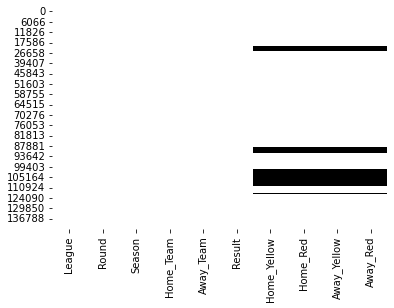

In [22]:
sns.heatmap(new_df.isna(),       
            cbar = False,    
            cmap = "binary")

In [23]:
new_df.head()

,League,Round,Season,Home_Team,Away_Team,Result,Home_Yellow,Home_Red,Away_Yellow,Away_Red
0,2_liga,1,1990,Saarbrücken,Stuttgarter Kickers,1-0,0.0,0.0,3.0,0.0
1,2_liga,1,1990,SC Freiburg,Unterhaching,2-3,1.0,0.0,0.0,0.0
2,2_liga,1,1990,VfL Osnabrück,Meppen,1-1,3.0,0.0,2.0,0.0
3,2_liga,1,1990,RW Essen,Schalke 04,0-0,2.0,0.0,2.0,0.0
4,2_liga,1,1990,Alemannia Aachen,MSV Duisburg,1-2,1.0,0.0,1.0,0.0


In [24]:
new_df['Home_Score'] = new_df['Result'].apply(get_home_result)
new_df['Away_Score'] = new_df['Result'].apply(get_away_result)

/tmp/ipykernel_397516/2345876381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Home_Score'] = new_df['Result'].apply(get_home_result)
/tmp/ipykernel_397516/2345876381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Away_Score'] = new_df['Result'].apply(get_away_result)


In [25]:
new_df

,League,Round,Season,Home_Team,Away_Team,Result,Home_Yellow,Home_Red,Away_Yellow,Away_Red,Home_Score,Away_Score
0,2_liga,1,1990,Saarbrücken,Stuttgarter Kickers,1-0,0.0,0.0,3.0,0.0,1,0
1,2_liga,1,1990,SC Freiburg,Unterhaching,2-3,1.0,0.0,0.0,0.0,2,3
2,2_liga,1,1990,VfL Osnabrück,Meppen,1-1,3.0,0.0,2.0,0.0,1,1
3,2_liga,1,1990,RW Essen,Schalke 04,0-0,2.0,0.0,2.0,0.0,0,0
4,2_liga,1,1990,Alemannia Aachen,MSV Duisburg,1-2,1.0,0.0,1.0,0.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
142530,serie_b,25,2021,Pisa,Vicenza,2-2,5.0,0.0,1.0,0.0,2,2
142531,serie_b,25,2021,Pescara,Lecce,1-1,1.0,0.0,1.0,0.0,1,1
142532,serie_b,25,2021,SPAL,Reggina,1-4,3.0,1.0,4.0,0.0,1,4
142533,serie_b,25,2021,AC Monza,Cittadella,0-0,2.0,0.0,4.0,0.0,0,0


In [26]:
for idx, match in new_df.iterrows():
    if match['Home_Score'] > match['Away_Score']:
        res = 1
    elif match['Home_Score'] < match['Away_Score']:
        res = -1
    else:
        res = 0
    new_df.loc[ idx, 'Result_Num'] = res

/tmp/ipykernel_397516/3832214150.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[ idx, 'Result_Num'] = res


In [27]:
new_df.head()

,League,Round,Season,Home_Team,Away_Team,Result,Home_Yellow,Home_Red,Away_Yellow,Away_Red,Home_Score,Away_Score,Result_Num
0,2_liga,1,1990,Saarbrücken,Stuttgarter Kickers,1-0,0.0,0.0,3.0,0.0,1,0,1.0
1,2_liga,1,1990,SC Freiburg,Unterhaching,2-3,1.0,0.0,0.0,0.0,2,3,-1.0
2,2_liga,1,1990,VfL Osnabrück,Meppen,1-1,3.0,0.0,2.0,0.0,1,1,0.0
3,2_liga,1,1990,RW Essen,Schalke 04,0-0,2.0,0.0,2.0,0.0,0,0,0.0
4,2_liga,1,1990,Alemannia Aachen,MSV Duisburg,1-2,1.0,0.0,1.0,0.0,1,2,-1.0


In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120947 entries, 0 to 142534
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   League       120947 non-null  object 
 1   Round        120947 non-null  object 
 2   Season       120947 non-null  object 
 3   Home_Team    120947 non-null  object 
 4   Away_Team    120947 non-null  object 
 5   Result       120947 non-null  object 
 6   Home_Yellow  105382 non-null  float64
 7   Home_Red     105382 non-null  float64
 8   Away_Yellow  105382 non-null  float64
 9   Away_Red     105382 non-null  float64
 10  Home_Score   120947 non-null  object 
 11  Away_Score   120947 non-null  object 
 12  Result_Num   120947 non-null  float64
dtypes: float64(5), object(8)
memory usage: 16.9+ MB


In [29]:
new_df.drop(new_df[new_df['League'] == 'eerste_divisie'].index, inplace=True)
new_df.drop(new_df[new_df['League'] == 'segunda_liga'].index, inplace=True)

/tmp/ipykernel_397516/2849268293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(new_df[new_df['League'] == 'eerste_divisie'].index, inplace=True)
/tmp/ipykernel_397516/2849268293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(new_df[new_df['League'] == 'segunda_liga'].index, inplace=True)


In [30]:
new_df.head()

,League,Round,Season,Home_Team,Away_Team,Result,Home_Yellow,Home_Red,Away_Yellow,Away_Red,Home_Score,Away_Score,Result_Num
0,2_liga,1,1990,Saarbrücken,Stuttgarter Kickers,1-0,0.0,0.0,3.0,0.0,1,0,1.0
1,2_liga,1,1990,SC Freiburg,Unterhaching,2-3,1.0,0.0,0.0,0.0,2,3,-1.0
2,2_liga,1,1990,VfL Osnabrück,Meppen,1-1,3.0,0.0,2.0,0.0,1,1,0.0
3,2_liga,1,1990,RW Essen,Schalke 04,0-0,2.0,0.0,2.0,0.0,0,0,0.0
4,2_liga,1,1990,Alemannia Aachen,MSV Duisburg,1-2,1.0,0.0,1.0,0.0,1,2,-1.0


In [31]:
import plotly.express as px

In [32]:
new_df['Home_Score'] = pd.to_numeric(new_df['Home_Score'], errors='coerce')

/tmp/ipykernel_397516/3962763301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Home_Score'] = pd.to_numeric(new_df['Home_Score'], errors='coerce')


In [33]:
new_df['Away_Score'] = pd.to_numeric(new_df['Away_Score'], errors='coerce')

/tmp/ipykernel_397516/2056007778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Away_Score'] = pd.to_numeric(new_df['Away_Score'], errors='coerce')


In [34]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120600 entries, 0 to 142534
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   League       120600 non-null  object 
 1   Round        120600 non-null  object 
 2   Season       120600 non-null  object 
 3   Home_Team    120600 non-null  object 
 4   Away_Team    120600 non-null  object 
 5   Result       120600 non-null  object 
 6   Home_Yellow  105126 non-null  float64
 7   Home_Red     105126 non-null  float64
 8   Away_Yellow  105126 non-null  float64
 9   Away_Red     105126 non-null  float64
 10  Home_Score   120596 non-null  float64
 11  Away_Score   120596 non-null  float64
 12  Result_Num   120600 non-null  float64
dtypes: float64(7), object(6)
memory usage: 12.9+ MB


In [35]:
new_df['total_goals'] = new_df['Home_Score'] + new_df['Away_Score']

/tmp/ipykernel_397516/2032559289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['total_goals'] = new_df['Home_Score'] + new_df['Away_Score']


In [36]:
new_df.head()

,League,Round,Season,Home_Team,Away_Team,Result,Home_Yellow,Home_Red,Away_Yellow,Away_Red,Home_Score,Away_Score,Result_Num,total_goals
0,2_liga,1,1990,Saarbrücken,Stuttgarter Kickers,1-0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,1.0
1,2_liga,1,1990,SC Freiburg,Unterhaching,2-3,1.0,0.0,0.0,0.0,2.0,3.0,-1.0,5.0
2,2_liga,1,1990,VfL Osnabrück,Meppen,1-1,3.0,0.0,2.0,0.0,1.0,1.0,0.0,2.0
3,2_liga,1,1990,RW Essen,Schalke 04,0-0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,2_liga,1,1990,Alemannia Aachen,MSV Duisburg,1-2,1.0,0.0,1.0,0.0,1.0,2.0,-1.0,3.0


<AxesSubplot:xlabel='Season'>

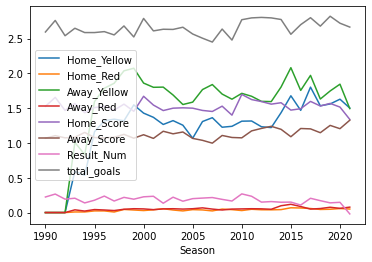

In [37]:
new_df[new_df['League'] == 'premier_league'].groupby('Season').mean().plot()

In [38]:
fig1 = px.bar(new_df.groupby('League')['total_goals'].mean(), title='Average number of goals per game by League', template= 'plotly_dark')
fig1.update_traces(marker_color='orange')
fig1.write_image('images/average_goals_by_season.png')
fig1.show()

In [39]:
fig1.update_traces(marker_color='orange')

In [40]:
fig1.show()

In [41]:
fig1.write_image('images/average_goals_by_season.png')

In [42]:
new_df.head()

,League,Round,Season,Home_Team,Away_Team,Result,Home_Yellow,Home_Red,Away_Yellow,Away_Red,Home_Score,Away_Score,Result_Num,total_goals
0,2_liga,1,1990,Saarbrücken,Stuttgarter Kickers,1-0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,1.0
1,2_liga,1,1990,SC Freiburg,Unterhaching,2-3,1.0,0.0,0.0,0.0,2.0,3.0,-1.0,5.0
2,2_liga,1,1990,VfL Osnabrück,Meppen,1-1,3.0,0.0,2.0,0.0,1.0,1.0,0.0,2.0
3,2_liga,1,1990,RW Essen,Schalke 04,0-0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,2_liga,1,1990,Alemannia Aachen,MSV Duisburg,1-2,1.0,0.0,1.0,0.0,1.0,2.0,-1.0,3.0


In [43]:
new_df['total_fouls'] = new_df['Home_Yellow'] + new_df['Home_Red'] + new_df['Away_Yellow'] + new_df['Away_Red']

/tmp/ipykernel_397516/313380051.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
new_df.head()

,League,Round,Season,Home_Team,Away_Team,Result,Home_Yellow,Home_Red,Away_Yellow,Away_Red,Home_Score,Away_Score,Result_Num,total_goals,total_fouls
0,2_liga,1,1990,Saarbrücken,Stuttgarter Kickers,1-0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,1.0,3.0
1,2_liga,1,1990,SC Freiburg,Unterhaching,2-3,1.0,0.0,0.0,0.0,2.0,3.0,-1.0,5.0,1.0
2,2_liga,1,1990,VfL Osnabrück,Meppen,1-1,3.0,0.0,2.0,0.0,1.0,1.0,0.0,2.0,5.0
3,2_liga,1,1990,RW Essen,Schalke 04,0-0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0
4,2_liga,1,1990,Alemannia Aachen,MSV Duisburg,1-2,1.0,0.0,1.0,0.0,1.0,2.0,-1.0,3.0,2.0


In [45]:
fig2 = px.bar(new_df.groupby('League')['total_fouls'].mean(), title='Average Number of Fouls by League', template= 'plotly_dark')
fig2.update_traces(marker_color='orange')
fig2.write_image('images/average_fouls_by_league.png')
fig2.show()

In [46]:
fig3 = px.bar(new_df.groupby('Season')['total_fouls'].mean(), title='Average Number of Fouls by Season', template= 'plotly_dark')
fig3.update_traces(marker_color='orange')
fig3.write_image('images/average_fouls_season.png')
fig3.show()

In [54]:
fig4 = px.bar(new_df.groupby('Season')['total_goals'].mean(), title='Average Number of Goals by Year', template= 'plotly_dark')
fig4.update_traces(marker_color='orange')
fig4.write_image('images/average_goals_season.png')
fig4.show()

In [55]:
goals_scatter = px.scatter(new_df.groupby('Season')['total_fouls'].mean(), title='Average Number of fouls per Season', template= 'plotly_dark')
goals_scatter.update_traces(marker_color='orange')
goals_scatter.write_image('images/average_fouls_season_scatter.png')
goals_scatter.show()

ModuleNotFoundError: No module named 'statsmodels'

In [49]:
goals_season_scatter = px.scatter(new_df.groupby('Season')['total_goals'].mean(), title='Average Number of Goals by Season', template= 'plotly_dark')
goals_season_scatter .update_traces(marker_color='orange')
goals_season_scatter .write_image('images/average_goals_season_scatter.png')
goals_season_scatter .show()

In [50]:
new_df.groupby(['Season']).sum()

,Home_Yellow,Home_Red,Away_Yellow,Away_Red,Home_Score,Away_Score,Result_Num,total_goals,total_fouls
Season,,,,,,,,,
1990,1925.0,49.0,2697.0,115.0,5106.0,3167.0,911.0,8273.0,4786.0
1991,2564.0,85.0,3489.0,170.0,5725.0,3532.0,1058.0,9257.0,6308.0
1992,2112.0,93.0,2861.0,157.0,5228.0,3367.0,911.0,8595.0,5223.0
1993,3434.0,109.0,4614.0,198.0,6122.0,3956.0,967.0,10078.0,8355.0
1994,3099.0,89.0,4241.0,177.0,5768.0,3780.0,962.0,9548.0,7606.0
1995,3571.0,183.0,4665.0,321.0,5465.0,3553.0,847.0,9018.0,8740.0
1996,3724.0,243.0,4787.0,366.0,5959.0,3891.0,981.0,9850.0,9120.0
1997,3817.0,194.0,5031.0,296.0,5345.0,3587.0,779.0,8932.0,9338.0
1998,4383.0,142.0,5743.0,196.0,4684.0,3219.0,691.0,7903.0,10464.0


In [51]:
home_team_adv = px.line(new_df.groupby('Season')['Result_Num'].sum(), title='Home Team Advantage by Season', template= 'plotly_dark')
home_team_adv.update_traces(marker_color='orange')
home_team_adv.write_image('home_team_adv.png')
home_team_adv.show()

In [52]:
home_team_adv_League = px.line(new_df.groupby('League')['Result_Num'].sum(), title='Home Team Advantage by League', template= 'plotly_dark')
home_team_adv_League.update_traces(marker_color='orange')
home_team_adv_League.write_image('home_team_adv_league.png')
home_team_adv_League.show()

In [53]:
new_df.head()

,League,Round,Season,Home_Team,Away_Team,Result,Home_Yellow,Home_Red,Away_Yellow,Away_Red,Home_Score,Away_Score,Result_Num,total_goals,total_fouls
0,2_liga,1,1990,Saarbrücken,Stuttgarter Kickers,1-0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,1.0,3.0
1,2_liga,1,1990,SC Freiburg,Unterhaching,2-3,1.0,0.0,0.0,0.0,2.0,3.0,-1.0,5.0,1.0
2,2_liga,1,1990,VfL Osnabrück,Meppen,1-1,3.0,0.0,2.0,0.0,1.0,1.0,0.0,2.0,5.0
3,2_liga,1,1990,RW Essen,Schalke 04,0-0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0
4,2_liga,1,1990,Alemannia Aachen,MSV Duisburg,1-2,1.0,0.0,1.0,0.0,1.0,2.0,-1.0,3.0,2.0


In [54]:
sums =new_df.groupby(['Season']).sum()